# **Wood Texture Classification**
### *Developed by Keen, assisted by OPhira and Nattakorn Kachainthon, a part of AI Builder 2023 program.*


## **Setup magic tools** *:>*


In [1]:
!pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

  Using cached fastbook-0.0.29-py3-none-any.whl (719 kB)
  Using cached transformers-4.30.1-py3-none-any.whl (7.2 MB)
  Using cached datasets-2.12.0-py3-none-any.whl (474 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached fastai-2.7.12-py3-none-any.whl (233 kB)
  Using cached sentencepiece-0.1.99-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached fastcore-1.5.29-py3-none-any.whl (67 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl (12 kB)
  Using cached torchvision-0.14.1-cp37-cp37m-manylinux1_x86_64.whl (24.2 MB)
  Using cached spacy-3.5.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached torch-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (887.5 MB)
  Using cached xxhash-3.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (213 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached responses-0.18.0-py3-none-any.wh

In [3]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from fastai.vision.all import *

## **Model setup** *:O*

In [4]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSubsetSplitter(train_sz=0.9, valid_sz=0.1),#GrandparentSplitter(valid_name='Test', train_name='Train'),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [5]:
dls = fields.dataloaders("data/wood_dataset_v2_1/")
dls.vocab

['Ash', 'Beech', 'Birch', 'Cherry', 'Maple', 'Oak', 'Pine', 'Teak', 'Walnut']

In [6]:
%matplotlib inline

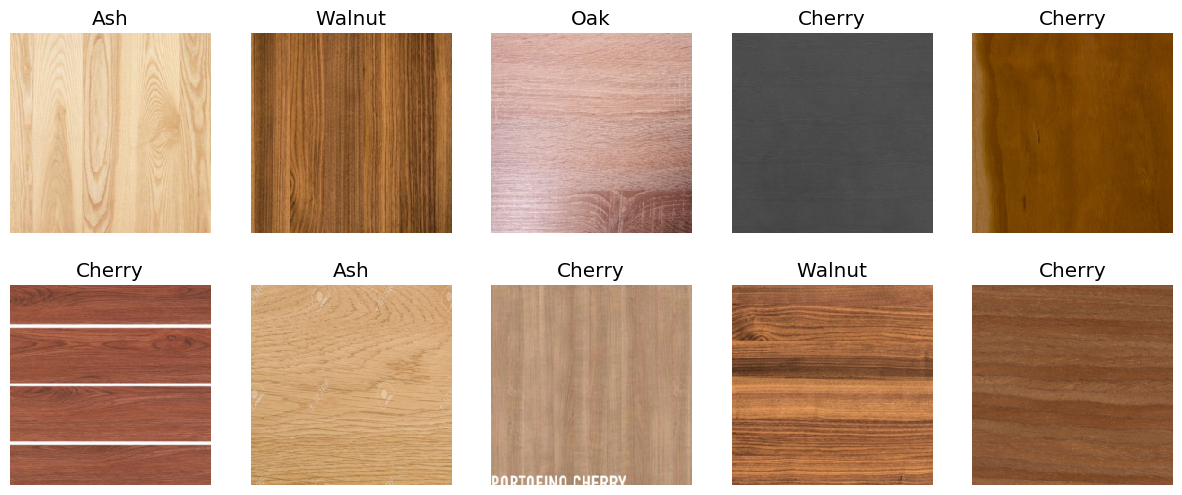

In [7]:
dls.valid.show_batch(max_n=10, nrows=2)

## **Train the model** *>:D*

In [8]:
learner = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=0.0010000000474974513)

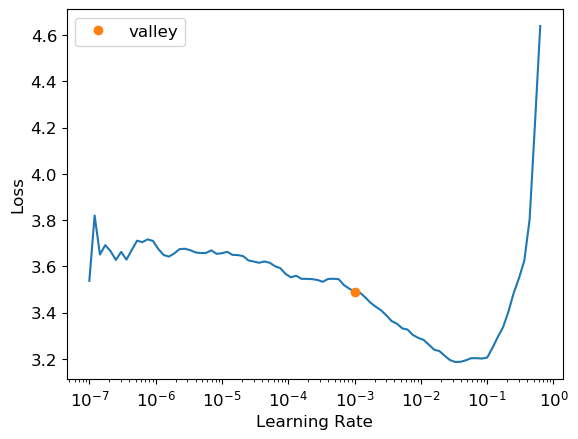

In [9]:
learner.lr_find()

In [10]:
learner.fine_tune(epochs=6, freeze_epochs=1, base_lr=0.0012)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.705568,1.909368,0.604194,0.395806,00:32


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency e

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.239618,1.695762,0.580603,0.419397,00:32
1,1.988495,1.533202,0.511140,0.488860,00:32
2,1.721825,1.417179,0.480996,0.519004,00:32
3,1.481010,1.322809,0.433814,0.566186,00:33
4,1.316192,1.250624,0.418086,0.581913,00:32
5,1.214885,1.231136,0.415465,0.584535,00:32


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency e

Precision: 0.585502643923869
Recall: 0.5869083876572703
F1 Score: 0.5862046730334687


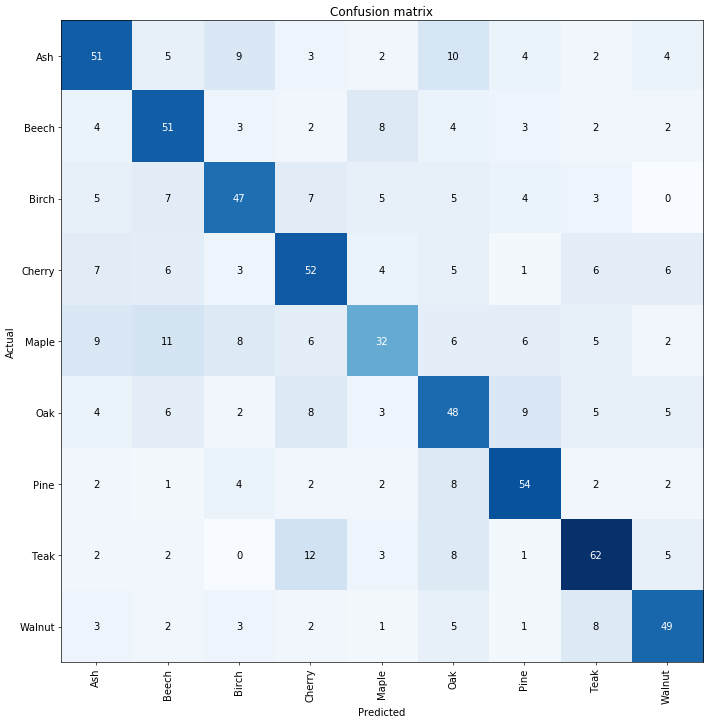

In [17]:
interp = ClassificationInterpretation.from_learner(learner)
cm = interp.confusion_matrix()
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
mean_prec = sum(prec)/len(prec)
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
mean_rec = sum(rec)/len(rec)
f1score = 2*(mean_prec*mean_rec)/(mean_prec+mean_rec)

print ('Precision: {}\nRecall: {}\nF1 Score: {}'.format(mean_prec, mean_rec, f1score))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


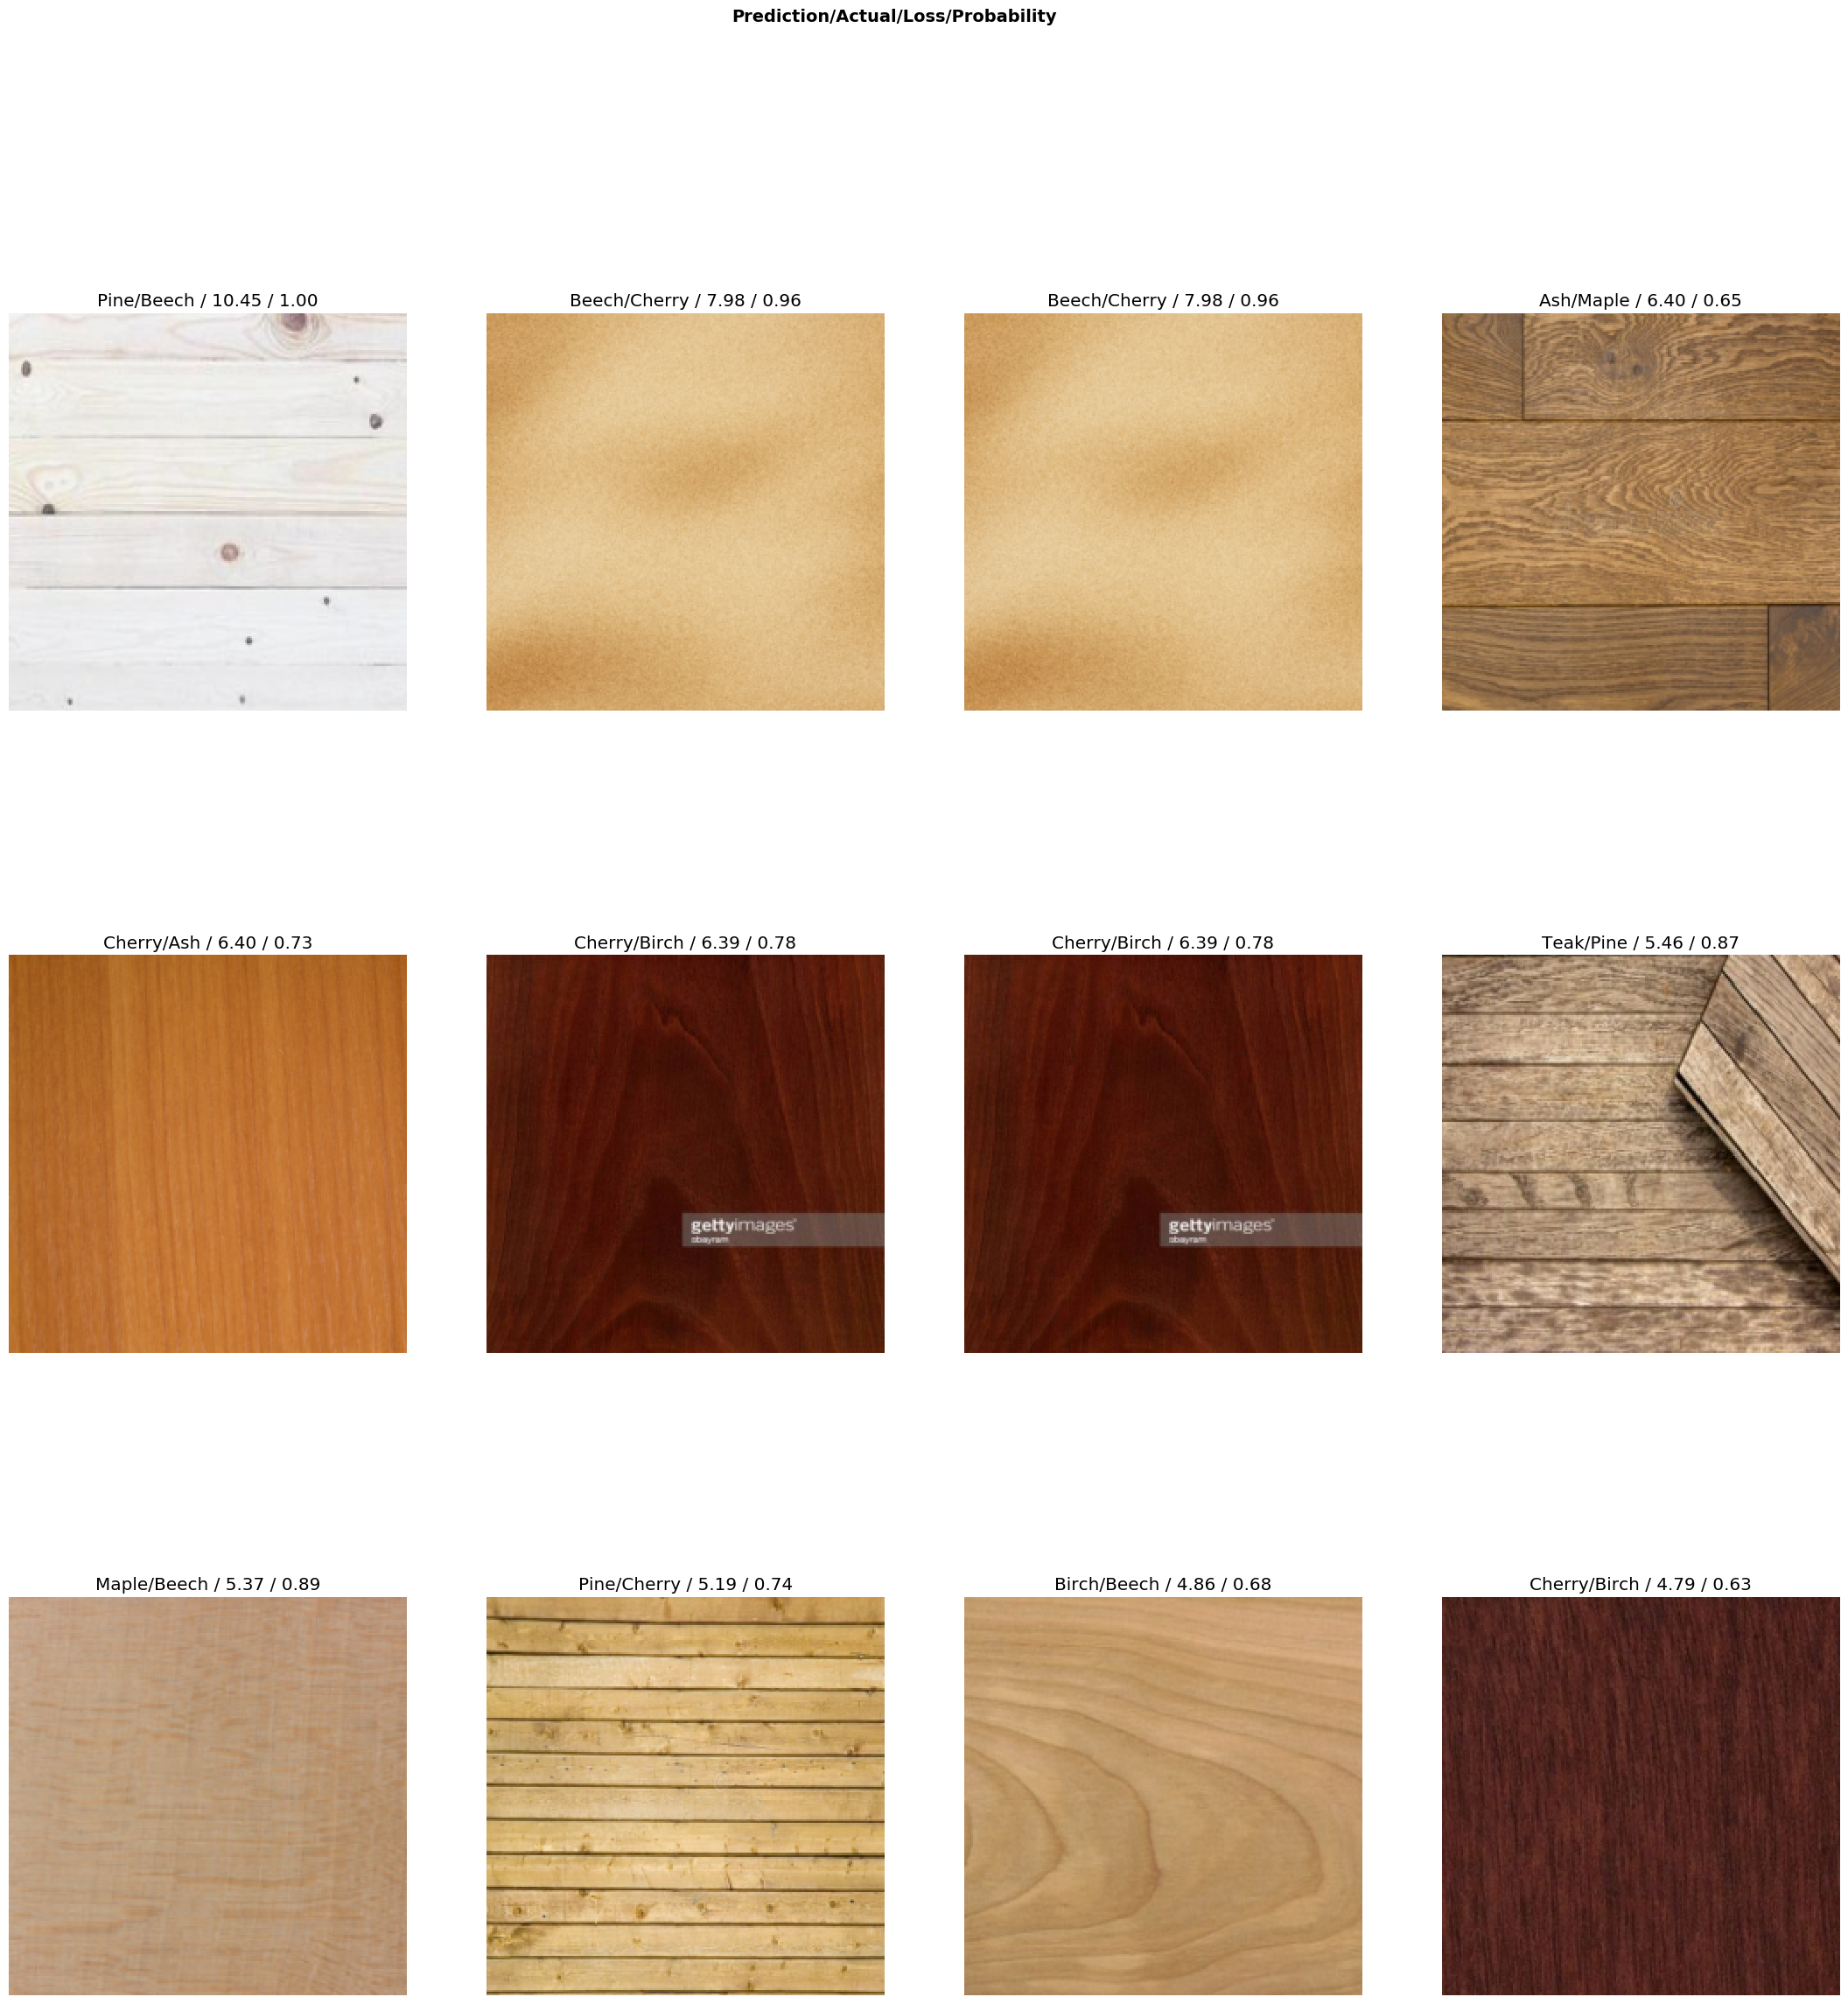

In [18]:
interp.plot_top_losses(12, figsize=(27,27))

In [19]:
interp.most_confused(min_val=1)

[('Teak', 'Cherry', 12),
 ('Maple', 'Beech', 11),
 ('Ash', 'Oak', 10),
 ('Ash', 'Birch', 9),
 ('Maple', 'Ash', 9),
 ('Oak', 'Pine', 9),
 ('Beech', 'Maple', 8),
 ('Maple', 'Birch', 8),
 ('Oak', 'Cherry', 8),
 ('Pine', 'Oak', 8),
 ('Teak', 'Oak', 8),
 ('Walnut', 'Teak', 8),
 ('Birch', 'Beech', 7),
 ('Birch', 'Cherry', 7),
 ('Cherry', 'Ash', 7),
 ('Cherry', 'Beech', 6),
 ('Cherry', 'Teak', 6),
 ('Cherry', 'Walnut', 6),
 ('Maple', 'Cherry', 6),
 ('Maple', 'Oak', 6),
 ('Maple', 'Pine', 6),
 ('Oak', 'Beech', 6),
 ('Ash', 'Beech', 5),
 ('Birch', 'Ash', 5),
 ('Birch', 'Maple', 5),
 ('Birch', 'Oak', 5),
 ('Cherry', 'Oak', 5),
 ('Maple', 'Teak', 5),
 ('Oak', 'Teak', 5),
 ('Oak', 'Walnut', 5),
 ('Teak', 'Walnut', 5),
 ('Walnut', 'Oak', 5),
 ('Ash', 'Pine', 4),
 ('Ash', 'Walnut', 4),
 ('Beech', 'Ash', 4),
 ('Beech', 'Oak', 4),
 ('Birch', 'Pine', 4),
 ('Cherry', 'Maple', 4),
 ('Oak', 'Ash', 4),
 ('Pine', 'Birch', 4),
 ('Ash', 'Cherry', 3),
 ('Beech', 'Birch', 3),
 ('Beech', 'Pine', 3),
 ('Birch', '

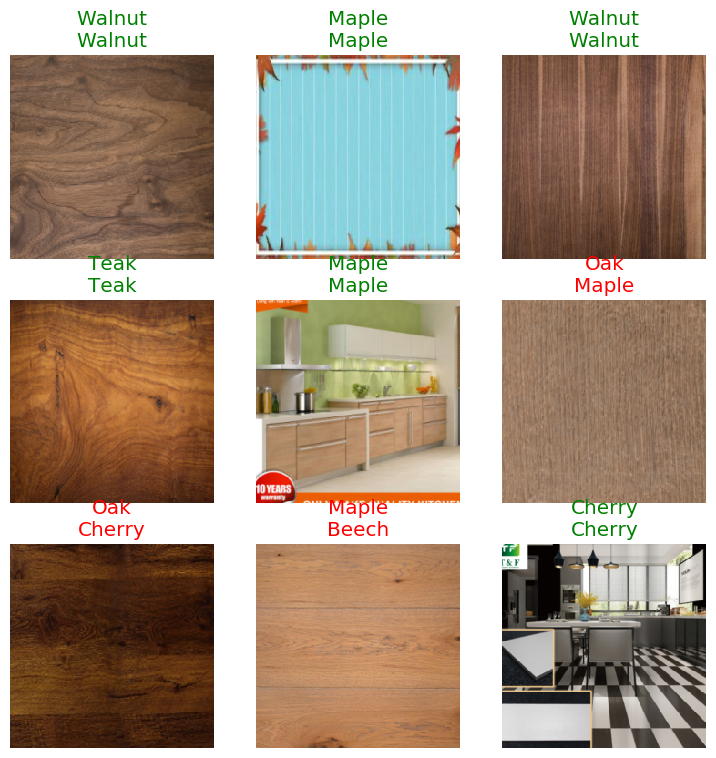

In [20]:
learner.show_results(shuffle=True)

## **Save the model** *:D*

In [19]:
learner.export("models/WoodClassification_FastAI_3_2.pkl")

## **Use the model** *,':}*

In [4]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('WoodClassification_FastAI_3_2.pkl')

In [12]:
input_img = "ash.jpg"
learn_inf.predict(input_img)

('Picea abies',
 tensor(7),
 tensor([1.6875e-02, 4.9199e-02, 1.0378e-05, 1.3309e-05, 2.0192e-04, 8.5166e-02, 1.8639e-04, 8.4254e-01, 5.8006e-03, 7.8870e-07, 2.7885e-06, 6.2528e-06]))